Tutorial referenced: https://youtu.be/vN_EuIfD42g?t=301

# What is Long Short Term Memory Model?

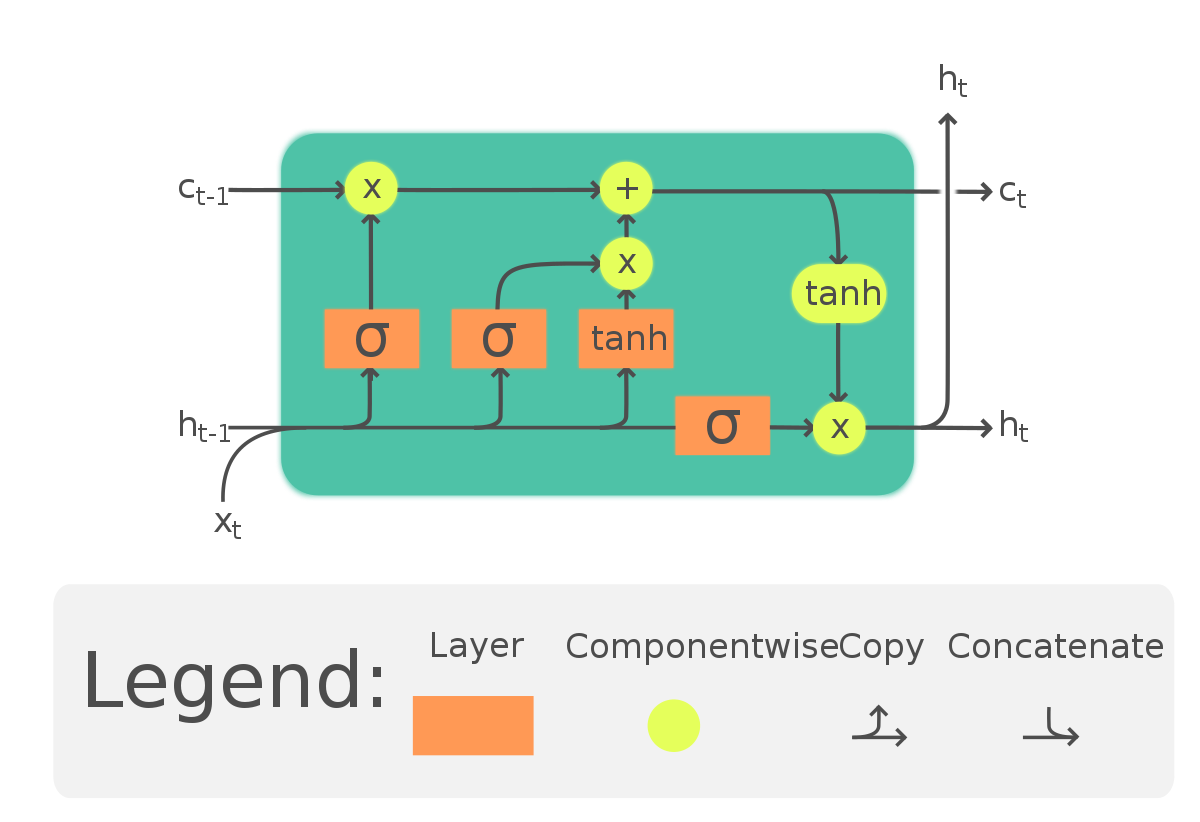
Photo credit: Guillaume Chevalier

This model includes a range of Recurrent Neural Networks with learning long-term dependencies that reduce the decay rate of the gradient. This is useful in sequence prediction scenarios.

# 1) Import libraries

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 2) Prepare dataset

In [14]:
#Dimensions of Dataframe

rows = 100
columns = 3

#Range of random generate floats
min_float = 0
max_float = 5

#Generation of random floats
fight_data = np.random.uniform(min_float,max_float, size=(rows,columns))

#Labelling Columns
column_labels = ["Round 1","Round 2", "Round 3"]

#Dataframe
fight_df = pd.DataFrame(fight_data, columns = column_labels)

#Round times to 2 decimal places
fight_df = fight_df.round(2)

fight_df.head()

,Round 1,Round 2,Round 3
0,0.94,3.81,3.33
1,0.22,3.70,0.84
2,1.18,2.49,1.18
3,3.27,3.80,2.19
4,2.81,2.09,3.69


# 3) Normalizing Data

Purpose of data normalization is to make data easy for model to process such as minimizing errors and eliminating redundant data points

In [16]:
scaler = StandardScaler().fit(fight_df.values)
transform_dataset = scaler.transform(fight_df.values)
transform_df = pd.DataFrame(data =transform_dataset,index=fight_df.index)

# 4) Defining Hyperparameters of Model

In [18]:
#Number of rows equals number of games
number_rows= fight_df.values.shape[0]
#Number of games we want to use for model prediction
num_games= 6
#Features of games is number of rounds
features_games = fight_df.values.shape[1] 

# 5) Create Train Dataset and Labels

In [21]:
# 3D array to represent the training dataset
fight_train = np.empty([number_rows-num_games,num_games,features_games], dtype=float)

#  2D array to store the labels
fight_label = np.empty([number_rows-num_games,features_games], dtype=float)

for i in range(0, number_rows-num_games):
    #creating a 3D array fight_train that holds sequential chunks of your dataset to be used as input sequences for the LSTM model.
    fight_train[i]=transform_df.iloc[i:i+num_games,0:num_games]
    #creating a 2D array fight_label that holds the corresponding labels for each input sequence in fight_train.
    fight_label[i]=transform_df.iloc[i+num_games:i+num_games+1,0:num_games]